# AUTOMATIC NUMBER PLATE RECOGNITION (ANPR)
# Using OpenCV + EasyOCR
# Dataset: Indian License Plates (Kaggle)

In [ ]:
# Upload kaggle.json (Kaggle API Key)
from google.colab import files
files.upload()

# Make a hidden .kaggle directory
!mkdir -p ~/.kaggle

# Move kaggle.json into the hidden directory
!cp kaggle.json ~/.kaggle/

# Set correct permissions (VERY IMPORTANT)
!chmod 600 ~/.kaggle/kaggle.json

# Verify success by listing datasets (optional)
!kaggle datasets list | head


Saving kaggle.json to kaggle.json
ref                                                             title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
aliiihussain/car-price-prediction                               Car Price Prediction Dataset (2025)                     46557  2025-10-17 19:54:34.140000           1060         24  1.0              
ahmeduzaki/global-earthquake-tsunami-risk-assessment-dataset    Global Earthquake-Tsunami Risk Assessment Dataset       16151  2025-10-01 16:35:53.273000          19122        649  1.0              
ayeshaimran123/social-media-and-mental-health-balance           Social Media and Mental Health Balance                   5941  2025-10-26 07:51:53.380000           3347  

In [ ]:
# Checking structure of /content directory
import os

for root, dirs, files in os.walk("/content", topdown=True):
    print(root)
    if root.count("/") > 5:
        break


/content
/content/.config
/content/.config/logs
/content/.config/logs/2025.11.04
/content/.config/configurations
/content/indian plates
/content/indian plates/positive
/content/indian number plate
/content/indian number plate/Indian Number Plate
/content/Indian Plates
/content/Indian Plates/positive
/content/Indian Number Plate
/content/Indian Number Plate/Indian Number Plate
/content/in
/content/in/in
/content/sample_data


In [ ]:
# Step 0: Installation and Imports
!pip install easyocr opencv-python matplotlib kaggle -q

import os, glob, random, cv2, matplotlib.pyplot as plt, easyocr

In [ ]:
# STEP 1: Kaggle Setup
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# STEP 2: Download Dataset
!kaggle datasets download -d thamizhsterio/indian-license-plates -p /content/ --force
!unzip -oq /content/indian-license-plates.zip -d /content/

Dataset URL: https://www.kaggle.com/datasets/thamizhsterio/indian-license-plates
License(s): unknown
 96% 441M/459M [00:06<00:00, 18.8MB/s]
100% 459M/459M [00:06<00:00, 73.1MB/s]


In [ ]:
# STEP 3: Locate License Plate Cropped Images
search_dirs = [
    "/content/Indian Number Plate/Indian Number Plate",
    "/content/indian number plate/Indian Number Plate",
    "/content/Indian Number Plate",
    "/content/indian number plate"
]

image_paths = []
for folder in search_dirs:
    image_paths += glob.glob(f"{folder}/**/*.jpg", recursive=True)
    image_paths += glob.glob(f"{folder}/**/*.png", recursive=True)

print(f"✅ Cropped License Plate Images Found: {len(image_paths)}")

if len(image_paths) == 0:
    raise FileNotFoundError("❌ Could not locate images. Dataset structure may differ.")

✅ Cropped License Plate Images Found: 41600


In [ ]:
# STEP 4: Load OCR Model
reader = easyocr.Reader(['en'])

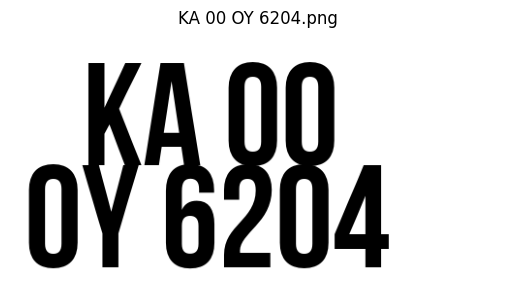

🅿️ Recognized Plate: 0K8284


In [ ]:
# STEP 5: Test on One Random Plate
def load_and_show(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(os.path.basename(path))
    plt.show()
    return img

sample = random.choice(image_paths)
img = load_and_show(sample)

result = reader.readtext(img)
plate_text = " ".join([res[1] for res in result]) if result else "(no text detected)"
print("🅿️ Recognized Plate:", plate_text)


📌 KA 01 AU 1598.png


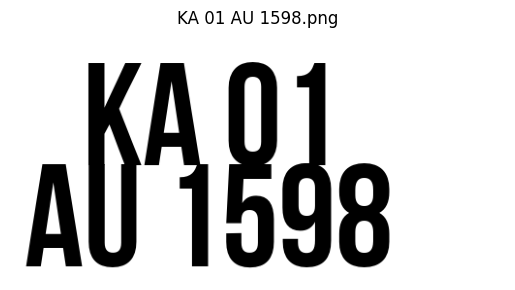

🔹 OCR Output: AKA8g8

📌 KA 43 UI 8870.png


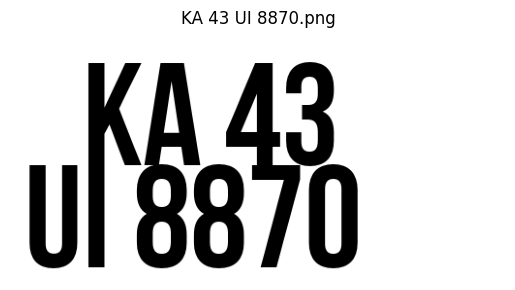

🔹 OCR Output: KA 43 Ul 8870

📌 KA 55 SV 6424.png


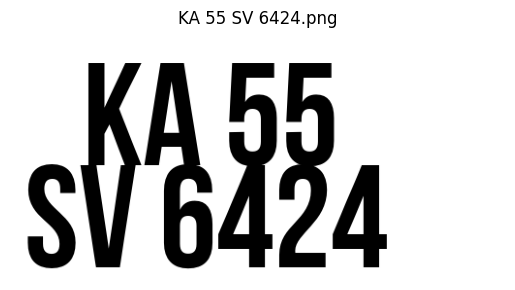

🔹 OCR Output: 5K8654

📌 KA 09 WI 7989.png


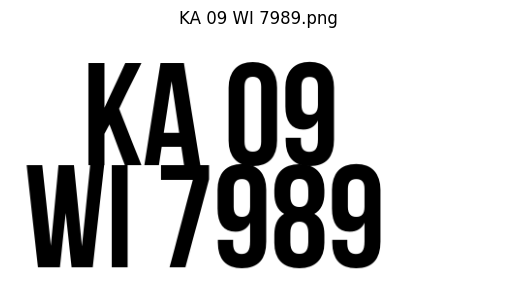

🔹 OCR Output: W498g

📌 KA 61 AX 3217.png


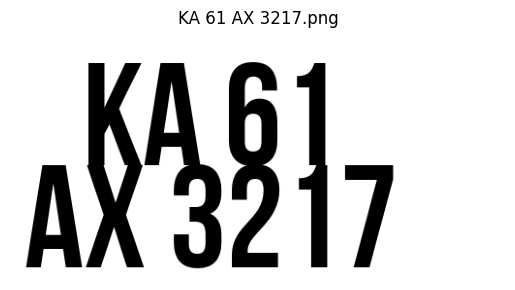

🔹 OCR Output: AKAeIz


In [ ]:
# STEP 6: Test Multiple Plates
def test_multiple(n=5):
    samples = random.sample(image_paths, min(n, len(image_paths)))
    for path in samples:
        print(f"\n📌 {os.path.basename(path)}")
        img = load_and_show(path)
        result = reader.readtext(img)
        text = " ".join([r[1] for r in result]) if result else "(no text detected)"
        print("🔹 OCR Output:", text)

test_multiple(5)


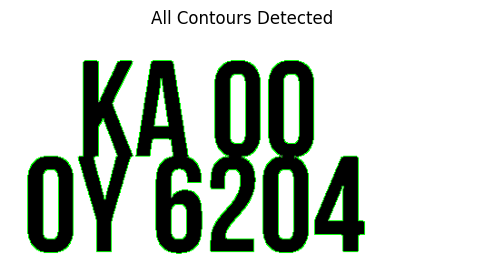

In [ ]:
# Visualize all detected contours
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 30, 200)
contours, _ = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

output_contours = img.copy()
cv2.drawContours(output_contours, contours, -1, (0, 255, 0), 1)

plt.figure(figsize=(6,6))
plt.imshow(output_contours)
plt.axis('off')
plt.title("All Contours Detected")
plt.show()


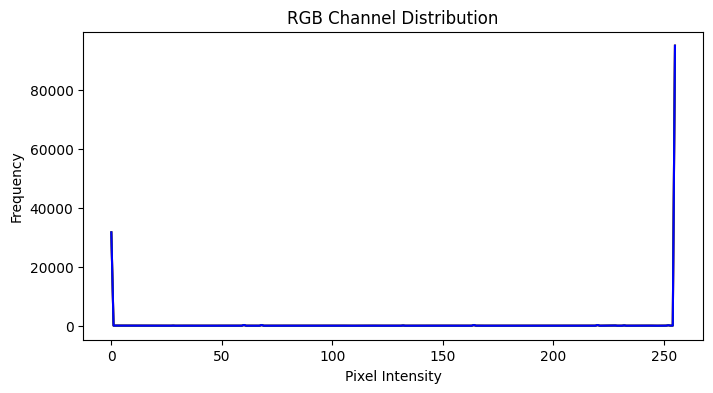

In [ ]:
colors = ('r', 'g', 'b')
plt.figure(figsize=(8,4))
for i, color in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=color)
plt.title("RGB Channel Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()
